# Import shuffled_data.csv file



In [1]:
import pandas as pd 

file_path = "../csvs/shuffled_data.csv"

data = pd.read_csv(file_path)

allDatapoints = data.iloc[:, :-1]
labels = data.iloc[:, -1]

# Number of training data points (80% of the data)
N = allDatapoints.shape[0] // 5 * 4

# Training data
trainData = allDatapoints.iloc[:N]

# Testing data
testData = allDatapoints.iloc[N:]

assert trainData.shape[0] + testData.shape[0] == allDatapoints.shape[0]

data.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,73,0,0,183,517,1,2,99,0,1.4,3,0.0,1
1,67,1,2,153,220,1,2,181,1,5.7,2,2.0,1
2,70,1,0,121,316,0,0,143,0,0.4,2,1.0,0
3,31,1,0,101,270,0,0,133,1,2.2,1,1.0,0
4,37,0,3,120,215,0,0,170,0,0.0,1,0.0,0


# Use K-Means from scikit-learn

In [3]:
# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

# imports
from sklearn.cluster import KMeans
from sklearn.metrics import completeness_score, fowlkes_mallows_score, silhouette_score

In [4]:
# K-Means Clustering
k_values = [2,3,4,5,6,7,8,9,10]

models = {}
completeness_scores = {}
fowlkes_mallows_scores = {}
silhouette_scores = {}

for k in k_values:
    # Train the model

    model = KMeans(n_clusters=k, random_state=5)

    models[k] = model.fit(trainData)

    # Predict the clusters for the test data
    test_clusters = models[k].predict(testData)

    # Calculate the completeness score for the test data
    completeness = completeness_score(labels[N:], test_clusters)
    completeness_scores[k] = completeness

    # Calculate the Fowlkes-Mallows score for the test data
    fowlkes_mallows = fowlkes_mallows_score(labels[N:], test_clusters)
    fowlkes_mallows_scores[k] = fowlkes_mallows

    silhouette = silhouette_score(testData, test_clusters)
    silhouette_scores[k] = silhouette

for k, score in completeness_scores.items():
    print(f'Completeness Score for k={k}: {score}')

for k, score in fowlkes_mallows_scores.items():
    print(f'Fowlkes-Mallows Score for k={k}: {score}')

for k, score in silhouette_scores.items():
    print(f'Silhouette Score for k={k}: {score}')

Completeness Score for k=2: 0.018117128589818638
Completeness Score for k=3: 0.043470632690230146
Completeness Score for k=4: 0.04074987705657431
Completeness Score for k=5: 0.05866281930270628
Completeness Score for k=6: 0.06161385504526717
Completeness Score for k=7: 0.055907773718877785
Completeness Score for k=8: 0.07256739362305832
Completeness Score for k=9: 0.06300157228193819
Completeness Score for k=10: 0.07295345771880866
Fowlkes-Mallows Score for k=2: 0.5241381465778961
Fowlkes-Mallows Score for k=3: 0.45166833375313054
Fowlkes-Mallows Score for k=4: 0.4127323863908567
Fowlkes-Mallows Score for k=5: 0.36734859581044654
Fowlkes-Mallows Score for k=6: 0.3437372711685683
Fowlkes-Mallows Score for k=7: 0.3129704356759573
Fowlkes-Mallows Score for k=8: 0.3057677802573984
Fowlkes-Mallows Score for k=9: 0.2867461568228817
Fowlkes-Mallows Score for k=10: 0.2799825041624532
Silhouette Score for k=2: 0.4612379989597102
Silhouette Score for k=3: 0.36767881774562156
Silhouette Score for

# Plotting

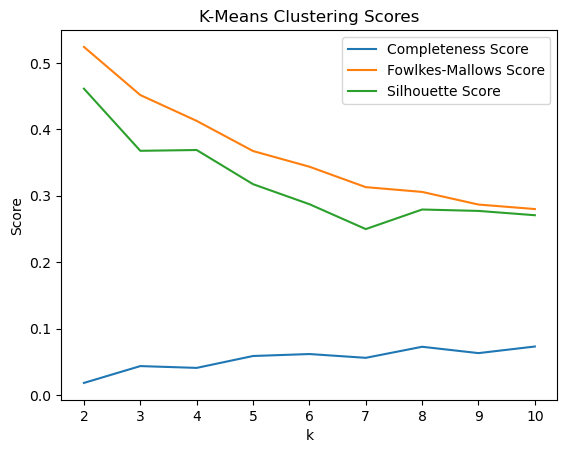

In [5]:
# Plot the scores
import matplotlib.pyplot as plt

plt.plot(completeness_scores.keys(), completeness_scores.values(), label='Completeness Score')
plt.plot(fowlkes_mallows_scores.keys(), fowlkes_mallows_scores.values(), label='Fowlkes-Mallows Score')
plt.plot(silhouette_scores.keys(), silhouette_scores.values(), label='Silhouette Score')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('K-Means Clustering Scores')
plt.legend()
plt.show()

# K-Means after PCA

From PCA, we are able to see that a few features appear frequently accross the tops of each PC, including
- Fasting Blood Sugar: Appears in PC1, PC6, PC7, PC9, PC10, and PC11.
- Resting BP: Appears in PC1, PC4, PC6, PC8, PC9, and PC11.
- Chest Pain: Appears in PC2, PC3, PC5, PC7, PC8, and PC11.
- Age: Appears in PC2, PC4, PC5, and PC7.
- Serum Cholesterol: Appears in PC1, PC3, PC9, and PC11.

Thus, we can use use the features listed for hopefully better results.

# Plotting


In [6]:
# Select the desired features
selected_features = ['restingBP', 'fastingbloodsugar', 'chestpain', 'age', 'serumcholestrol']

# Initialize dictionaries to store scores and models
models_5features = {}
completeness_scores_5features = {}
fowlkes_mallows_scores_5features = {}
silhouette_scores_5features = {}

models_4features = {}
completeness_scores_4features = {}
fowlkes_mallows_scores_4features = {}
silhouette_scores_4features = {}

models_3features = {}
completeness_scores_3features = {}
fowlkes_mallows_scores_3features = {}
silhouette_scores_3features = {}

models_2features = {}
completeness_scores_2features = {}
fowlkes_mallows_scores_2features = {}
silhouette_scores_2features = {}

# Perform K-Means clustering with decreasing number of features
for i in range(len(selected_features), 1, -1):
    current_features = selected_features[:i]
    current_data = data[current_features]
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=5)
        kmeans.fit(current_data)
        clusters = kmeans.predict(current_data)
        
        if i == 5:
            models_5features[f'k={k}'] = kmeans
            completeness_scores_5features[f'k={k}'] = completeness_score(labels, clusters)
            fowlkes_mallows_scores_5features[f'k={k}'] = fowlkes_mallows_score(labels, clusters)
            silhouette_scores_5features[f'k={k}'] = silhouette_score(current_data, clusters)
        elif i == 4:
            models_4features[f'k={k}'] = kmeans
            completeness_scores_4features[f'k={k}'] = completeness_score(labels, clusters)
            fowlkes_mallows_scores_4features[f'k={k}'] = fowlkes_mallows_score(labels, clusters)
            silhouette_scores_4features[f'k={k}'] = silhouette_score(current_data, clusters)
        elif i == 3:
            models_3features[f'k={k}'] = kmeans
            completeness_scores_3features[f'k={k}'] = completeness_score(labels, clusters)
            fowlkes_mallows_scores_3features[f'k={k}'] = fowlkes_mallows_score(labels, clusters)
            silhouette_scores_3features[f'k={k}'] = silhouette_score(current_data, clusters)
        elif i == 2:
            models_2features[f'k={k}'] = kmeans
            completeness_scores_2features[f'k={k}'] = completeness_score(labels, clusters)
            fowlkes_mallows_scores_2features[f'k={k}'] = fowlkes_mallows_score(labels, clusters)
            silhouette_scores_2features[f'k={k}'] = silhouette_score(current_data, clusters)

# Display the scores
for key in completeness_scores_5features:
    print(f'5 features, {key}: Completeness Score={completeness_scores_5features[key]}, Fowlkes-Mallows Score={fowlkes_mallows_scores_5features[key]}, Silhouette Score={silhouette_scores_5features[key]}')

for key in completeness_scores_4features:
    print(f'4 features, {key}: Completeness Score={completeness_scores_4features[key]}, Fowlkes-Mallows Score={fowlkes_mallows_scores_4features[key]}, Silhouette Score={silhouette_scores_4features[key]}')

for key in completeness_scores_3features:
    print(f'3 features, {key}: Completeness Score={completeness_scores_3features[key]}, Fowlkes-Mallows Score={fowlkes_mallows_scores_3features[key]}, Silhouette Score={silhouette_scores_3features[key]}')

for key in completeness_scores_2features:
    print(f'2 features, {key}: Completeness Score={completeness_scores_2features[key]}, Fowlkes-Mallows Score={fowlkes_mallows_scores_2features[key]}, Silhouette Score={silhouette_scores_2features[key]}')


5 features, k=2: Completeness Score=0.023289995752942386, Fowlkes-Mallows Score=0.5208842207995324, Silhouette Score=0.49314507341101865
5 features, k=3: Completeness Score=0.07202432914726098, Fowlkes-Mallows Score=0.5163097904723044, Silhouette Score=0.4998138815233587
5 features, k=4: Completeness Score=0.07415479067592723, Fowlkes-Mallows Score=0.4426466870480768, Silhouette Score=0.44364403348803805
5 features, k=5: Completeness Score=0.05425278536146093, Fowlkes-Mallows Score=0.37399021070679545, Silhouette Score=0.39081594849821283
5 features, k=6: Completeness Score=0.06748954888701912, Fowlkes-Mallows Score=0.34906822297084505, Silhouette Score=0.3691266883808633
5 features, k=7: Completeness Score=0.06496345759147377, Fowlkes-Mallows Score=0.32488571175259984, Silhouette Score=0.3359708464178146
5 features, k=8: Completeness Score=0.06762053179881344, Fowlkes-Mallows Score=0.30963931381716336, Silhouette Score=0.3289536880346179
5 features, k=9: Completeness Score=0.073920739

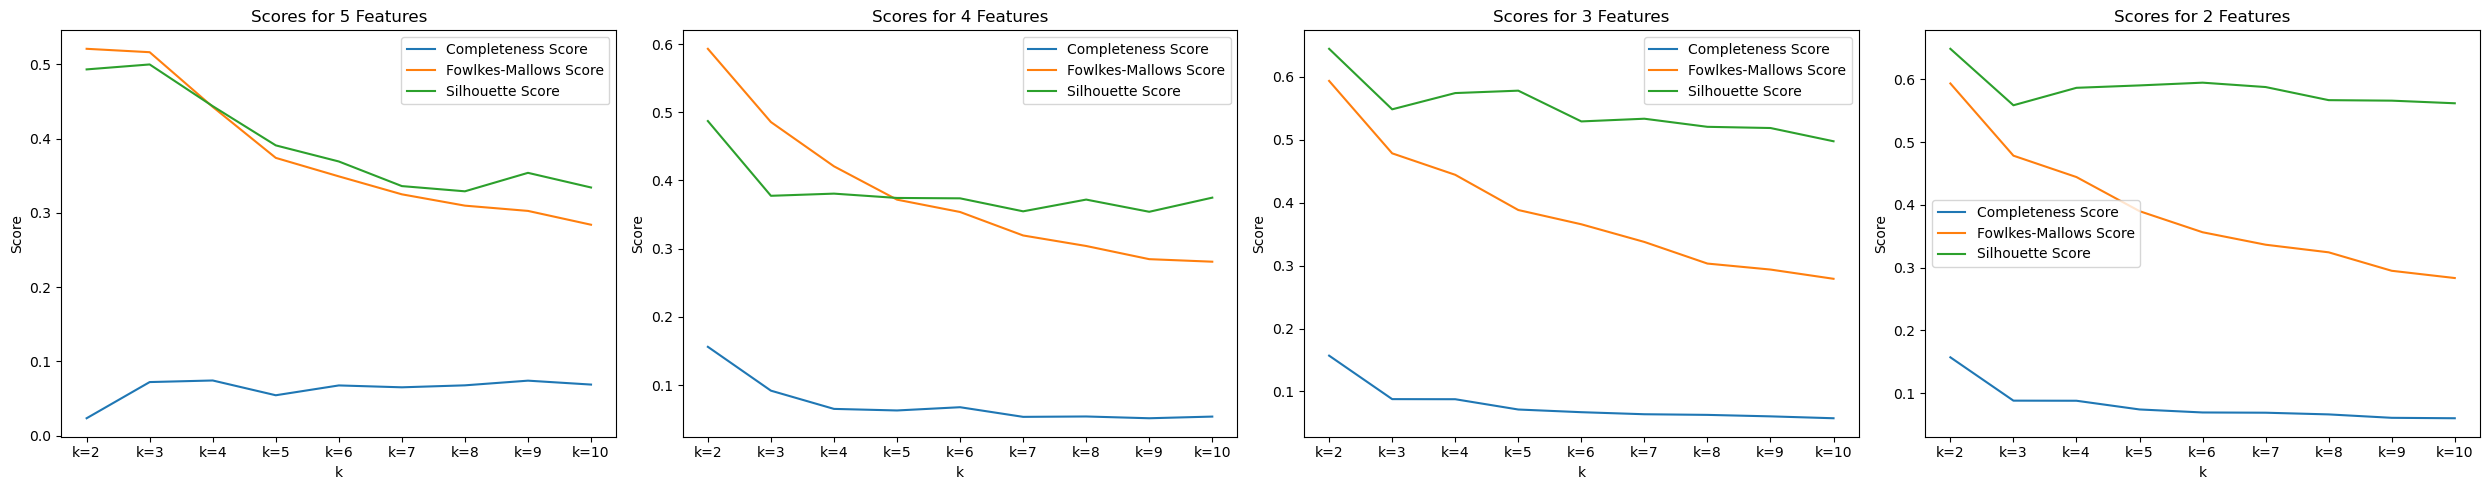

In [7]:
# Plotting the scores for different numbers of features
fig, axes = plt.subplots(1, 4, figsize=(25, 5))

# Plot for 5 features
axes[0].plot(completeness_scores_5features.keys(), completeness_scores_5features.values(), label='Completeness Score')
axes[0].plot(fowlkes_mallows_scores_5features.keys(), fowlkes_mallows_scores_5features.values(), label='Fowlkes-Mallows Score')
axes[0].plot(silhouette_scores_5features.keys(), silhouette_scores_5features.values(), label='Silhouette Score')
axes[0].set_xlabel('k')
axes[0].set_ylabel('Score')
axes[0].set_title('Scores for 5 Features')
axes[0].legend()

# Plot for 4 features
axes[1].plot(completeness_scores_4features.keys(), completeness_scores_4features.values(), label='Completeness Score')
axes[1].plot(fowlkes_mallows_scores_4features.keys(), fowlkes_mallows_scores_4features.values(), label='Fowlkes-Mallows Score')
axes[1].plot(silhouette_scores_4features.keys(), silhouette_scores_4features.values(), label='Silhouette Score')
axes[1].set_xlabel('k')
axes[1].set_ylabel('Score')
axes[1].set_title('Scores for 4 Features')
axes[1].legend()

# Plot for 3 features
axes[2].plot(completeness_scores_3features.keys(), completeness_scores_3features.values(), label='Completeness Score')
axes[2].plot(fowlkes_mallows_scores_3features.keys(), fowlkes_mallows_scores_3features.values(), label='Fowlkes-Mallows Score')
axes[2].plot(silhouette_scores_3features.keys(), silhouette_scores_3features.values(), label='Silhouette Score')
axes[2].set_xlabel('k')
axes[2].set_ylabel('Score')
axes[2].set_title('Scores for 3 Features')
axes[2].legend()

# Plot for 2 features
axes[3].plot(completeness_scores_2features.keys(), completeness_scores_2features.values(), label='Completeness Score')
axes[3].plot(fowlkes_mallows_scores_2features.keys(), fowlkes_mallows_scores_2features.values(), label='Fowlkes-Mallows Score')
axes[3].plot(silhouette_scores_2features.keys(), silhouette_scores_2features.values(), label='Silhouette Score')
axes[3].set_xlabel('k')
axes[3].set_ylabel('Score')
axes[3].set_title('Scores for 2 Features')
axes[3].legend()

plt.tight_layout()
plt.show()

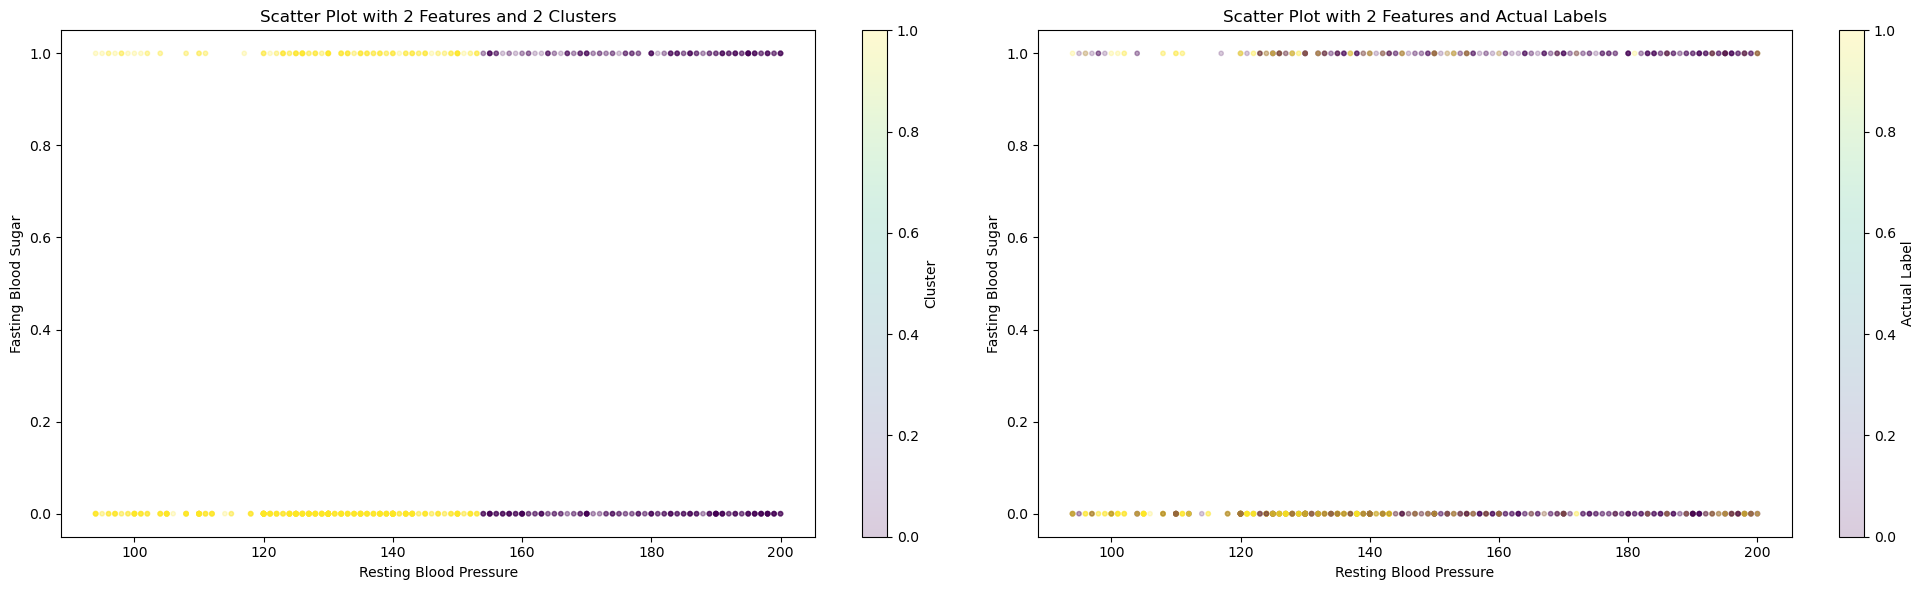

In [15]:
# Scatter plot with 2 features and 2 clusters
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot with predicted clusters
axes[0].scatter(current_data['restingBP'], current_data['fastingbloodsugar'], c=test_clusters, s=10, alpha=0.2)
axes[0].set_xlabel('Resting Blood Pressure')
axes[0].set_ylabel('Fasting Blood Sugar')
axes[0].set_title('Scatter Plot with 2 Features and 2 Clusters')
fig.colorbar(axes[0].collections[0], ax=axes[0], label='Cluster')

# Plot with actual labels
axes[1].scatter(current_data['restingBP'], current_data['fastingbloodsugar'], c=1-labels, s=10, alpha=0.2)
axes[1].set_xlabel('Resting Blood Pressure')
axes[1].set_ylabel('Fasting Blood Sugar')
axes[1].set_title('Scatter Plot with 2 Features and Actual Labels')
fig.colorbar(axes[1].collections[0], ax=axes[1], label='Actual Label')

plt.tight_layout()
plt.show()